- **Purpose:** To go through the decoupler tutorial (within its documentation) on pseudotime enrichment analysis
- **Date:** July 27, 2025

# 0. Packages and data

In [1]:
# Install packages
!pip install scanpy
!pip install decoupler[full]
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [2]:
# Import packages
import scanpy as sc
import decoupler as dc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Package version
sc.logging.print_header()

/usr/local/lib/python3.11/dist-packages/session_info2/__init__.py:125: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  and (v := getattr(pkg, "__version__", None))


AttributeError: 'HBox' object has no attribute '_repr_mimebundle_'

scanpy	1.11.3
decoupler	2.1.1
pandas	2.2.2
numpy	2.0.2
matplotlib	3.10.0
seaborn	0.13.2
----	----
tornado	6.4.2
traitlets	5.7.1
Cython	3.0.12
Jinja2	3.1.6
statsmodels	0.14.5
msgpack	1.1.1
plotly	5.24.1
python-snappy	0.7.3
toolz	0.12.1
google-resumable-media	2.7.2
pexpect	4.9.0
sphinxcontrib-applehelp	2.0.0
xgboost	3.0.2
six	1.17.0
scipy	1.15.3
grpc-google-iam-v1	0.14.2
igraph	0.11.9
cloudpickle	3.1.1
google-cloud-language	2.17.2
patsy	1.0.1
dataproc-spark-connect	0.8.3
portpicker	1.5.2
idna	3.10
zarr	3.1.0
PyYAML	6.0.2
cupy-cuda12x	13.3.0
matplotlib-inline	0.1.7
typing_extensions	4.14.1
ipython	7.34.0
sphinxcontrib-htmlhelp	2.1.0
ipywidgets	7.7.1
google-genai	1.27.0
pycparser	2.22
session-info2	0.2
ipython-genutils	0.2.0
legendkit	0.3.6
requests	2.32.3
google-cloud-iam	2.19.1
importlib_metadata	8.7.0
setuptools	75.2.0
google-auth	2.38.0
platformdirs	4.3.8
backcall	0.2.0
scikit-learn	1.6.1
cramjam	2.10.0
debugpy	1.8.15
ipykernel	6.17.1
omegaconf	2.3.0
google-cloud-core	2.4.3
Pygments	2.

In [4]:
# Load the dataset
adata = dc.ds.erygast1k()
adata

AnnData object with n_obs × n_vars = 801 × 8124
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    uns: 'celltype_colors', 'log1p'
    obsm: 'X_pca', 'X_umap'

In [5]:
# Look at the obs dataframe
adata.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, GTGGATTGCGTCTC to ACGGTCCTTTTCAC
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   sample            801 non-null    category
 1   stage             801 non-null    category
 2   sequencing.batch  801 non-null    category
 3   theiler           801 non-null    category
 4   celltype          801 non-null    category
dtypes: category(5)
memory usage: 44.0+ KB


In [6]:
# Describe the adata
adata.obs.describe()

,sample,stage,sequencing.batch,theiler,celltype
count,801,801,801,801,801
unique,23,7,3,3,5
top,16,E8.5,2,TS12,Erythroid1
freq,91,242,410,614,247


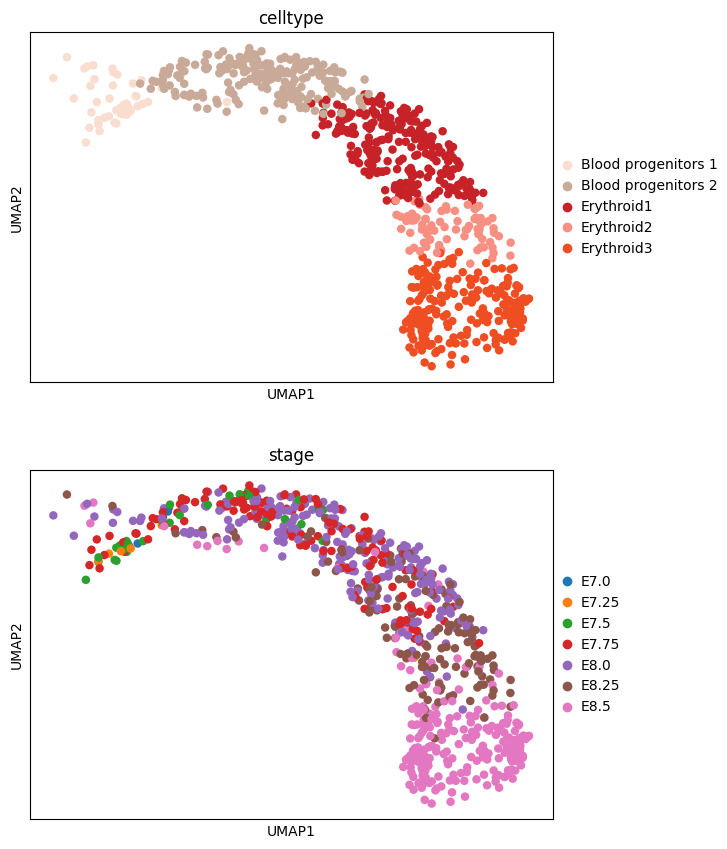

In [7]:
# UMAP plot
sc.pl.umap(adata, color=["celltype", "stage"], ncols=1)

# 1. Pseudotime inference

In [8]:
# Root cell and PAGA
root_celltype = "Blood progenitors 1"

sc.pp.neighbors(adata, use_rep="X_pca") # neighborhood
sc.tl.diffmap(adata) # diffusion map
sc.pp.neighbors(adata, use_rep="X_diffmap")
sc.tl.paga(adata, groups="celltype") # PAGA graph

In [9]:
# Set the iroot and calculation diffusion time
iroot = np.flatnonzero(adata.obs["celltype"] == root_celltype)[0]
adata.uns["iroot"] = iroot
sc.tl.dpt(adata)

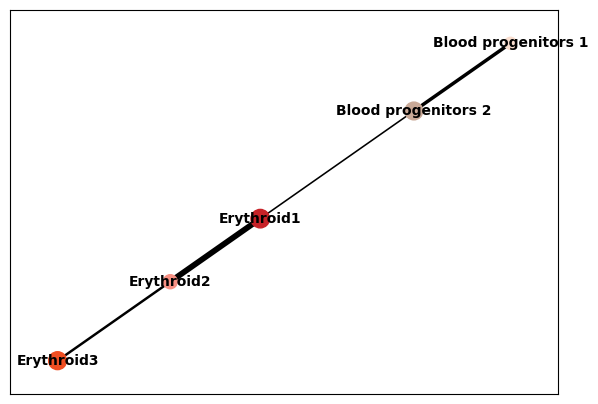

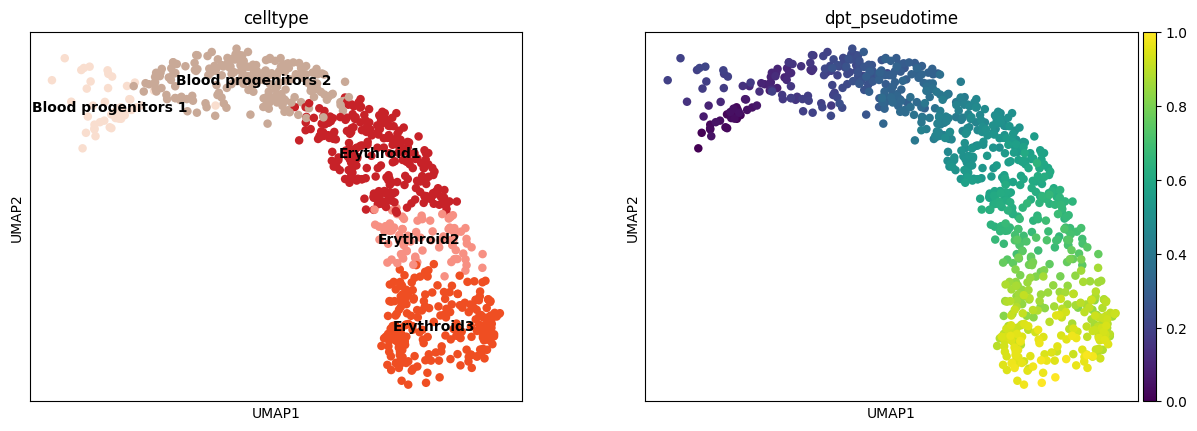

In [10]:
# Visuzlise
sc.pl.paga(adata, color=["celltype"])
sc.pl.umap(adata, color=["celltype", "dpt_pseudotime"], legend_loc="on data")

# 2. Enrichment analysis

In [11]:
# CollecTRI
collectri = dc.op.collectri(organism="mouse")
collectri.head()

,source,target,weight,resources,references,sign_decision
0,Myc,Tert,1.0,DoRothEA-A;ExTRI;HTRI;NTNU.Curated;Pavlidis202...,10022128;10491298;10606235;10637317;10723141;1...,PMID
1,Spi1,Bglap3,1.0,ExTRI,10022617,default activation
2,Spi1,Bglap,1.0,ExTRI,10022617,default activation
3,Spi1,Bglap2,1.0,ExTRI,10022617,default activation
4,Smad3,Jun,1.0,ExTRI;NTNU.Curated;TFactS;TRRUST,10022869;12374795,PMID


In [12]:
# Scoring of transcription factors
dc.mt.ulm(data=adata, net=collectri)

In [13]:
# Scores
score = dc.pp.get_obsm(adata=adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 801 × 513
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'dpt_pseudotime'
    uns: 'celltype_colors', 'log1p', 'stage_colors', 'neighbors', 'diffmap_evals', 'paga', 'celltype_sizes', 'iroot'
    obsm: 'X_pca', 'X_umap', 'X_diffmap', 'score_ulm', 'padj_ulm'

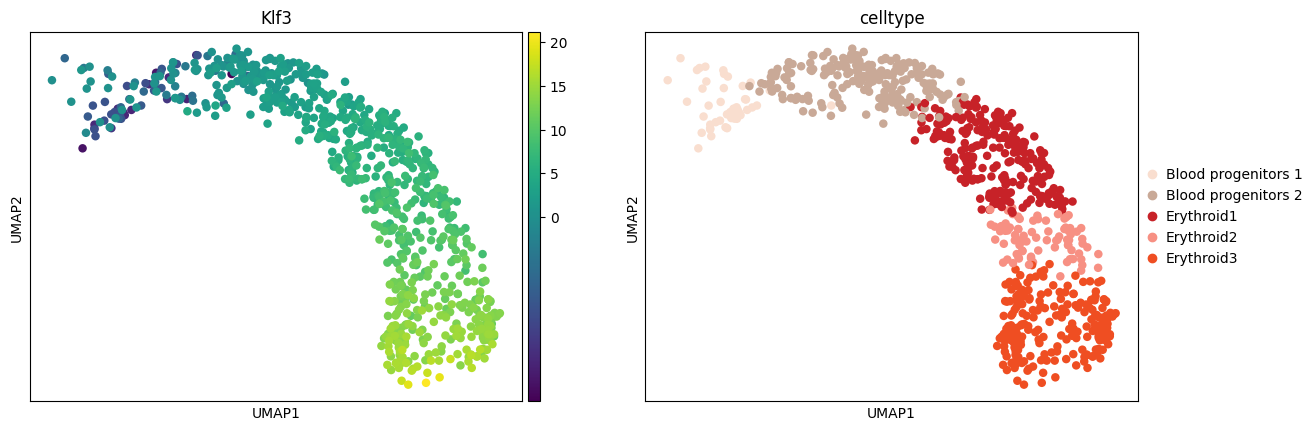

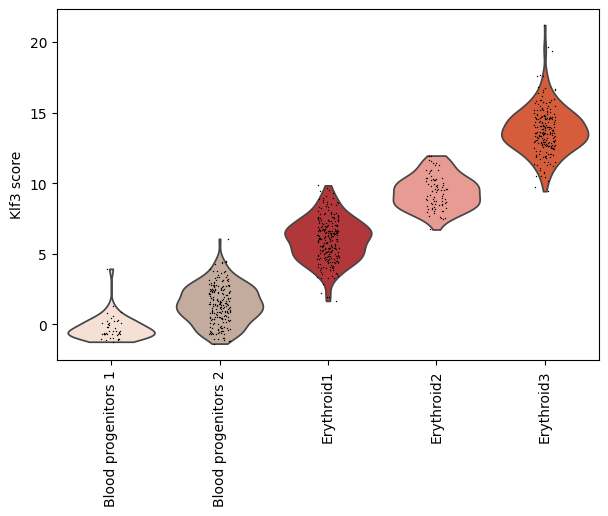

In [14]:
# Visualize for a known transcription factor
tf = "Klf3"
sc.pl.umap(score, color=[tf, "celltype"], vcenter=0)
sc.pl.violin(score, keys=[tf], groupby="celltype", rotation=90, ylabel=f"{tf} score")

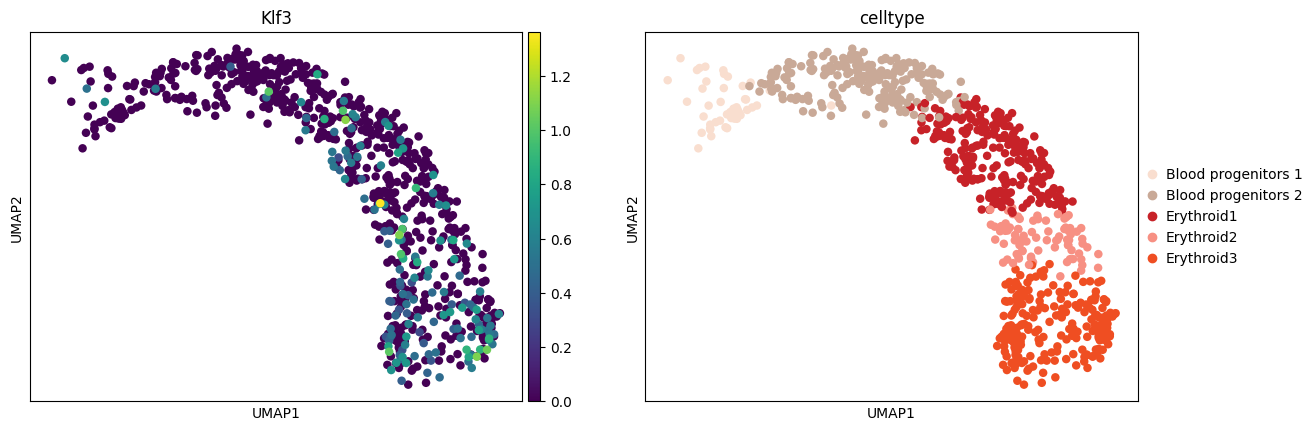

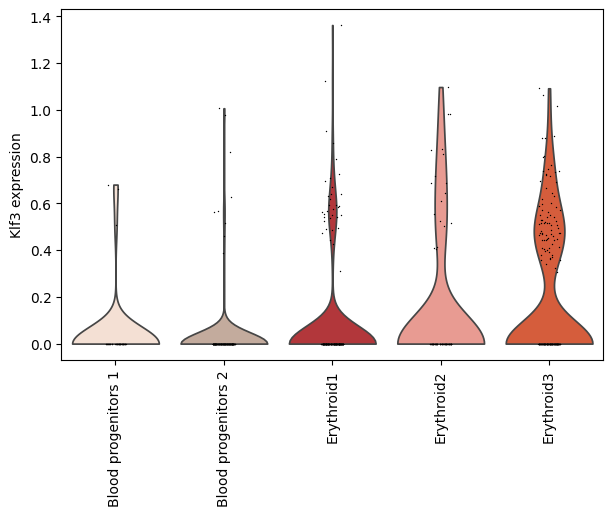

In [15]:
# Expression alone is not a reliable proxy for its activity
# So, activity score is important
sc.pl.umap(adata, color=[tf, "celltype"])
sc.pl.violin(adata, keys=[tf], groupby="celltype", rotation=90, ylabel=f"{tf} expression")

In [16]:
# List transcription factors
tfs = dc.tl.rankby_order(
    adata=score,
    order="dpt_pseudotime",
    stat="dcor"
)
tfs

,name,stat,pval,padj
0,Klf3,1924.545622,0.000000,0.000000
1,Klf1,1802.000715,0.000000,0.000000
2,Hoxb6,1720.184784,0.000000,0.000000
3,Nfe2,1715.817219,0.000000,0.000000
4,Atrx,1562.600819,0.000000,0.000000
...,...,...,...,...
508,Nr0b1,-0.382287,0.648875,0.653975
509,Msc,-0.464131,0.678723,0.682715
510,Rb1,-0.501624,0.692034,0.694742
511,Crx,-0.658420,0.744866,0.746320


In [17]:
# Top 5 tfs associated with pseudotime
top_tfs = tfs.head(5)["name"].to_list()
top_tfs

['Klf3', 'Klf1', 'Hoxb6', 'Nfe2', 'Atrx']

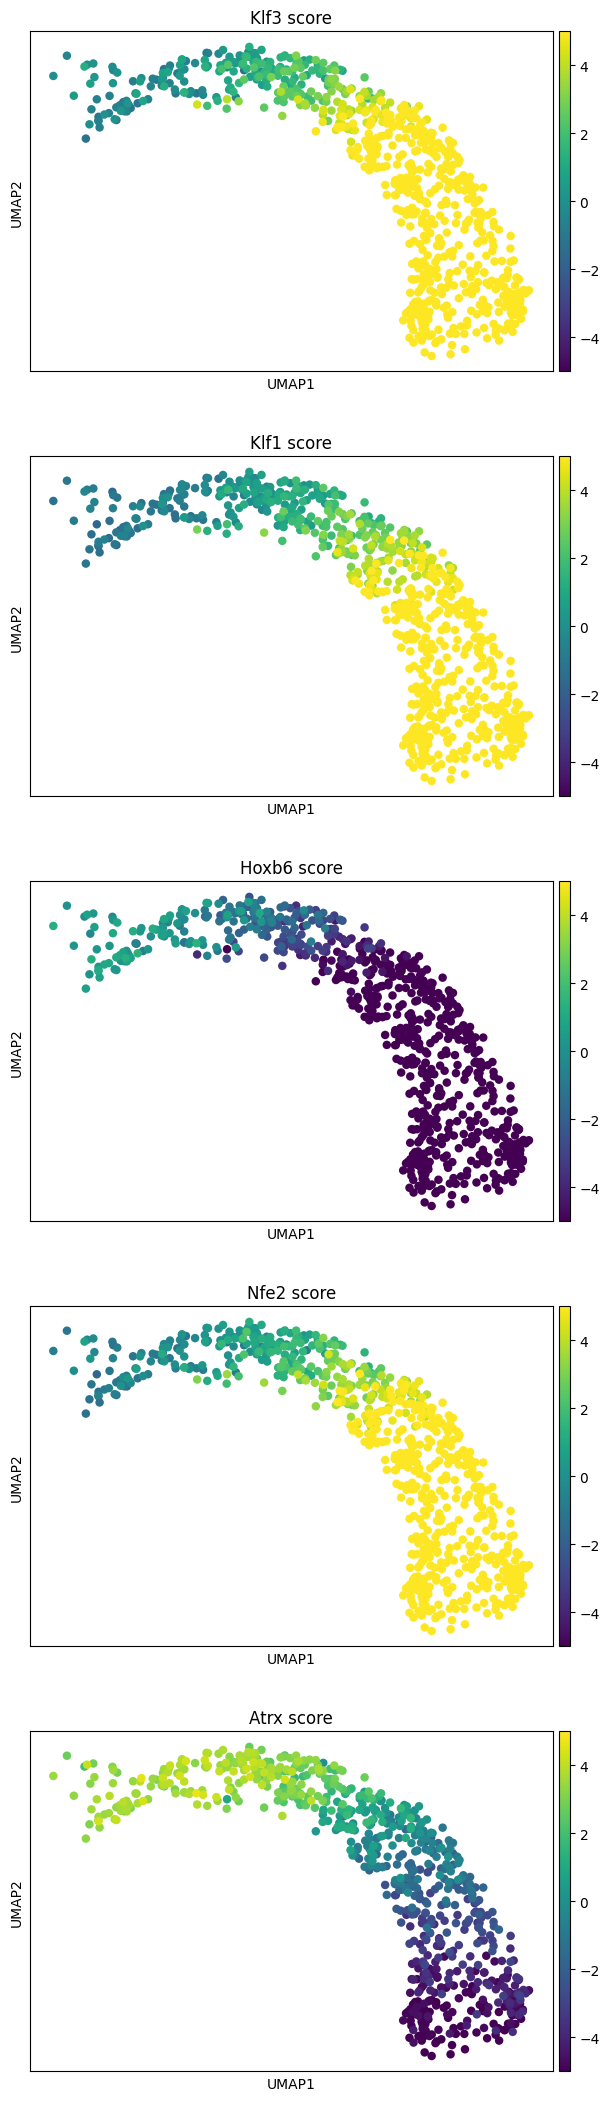

In [18]:
# Visualise the top genes
sc.pl.umap(score, color=top_tfs, vmin=-5, vmax=5, ncols=1, title=[f"{t} score" for t in top_tfs])

In [19]:
# Group the cells into bins
bin_tfs = dc.pp.bin_order(
    adata=score,
    order="dpt_pseudotime",
    names=top_tfs,
    label="celltype"
)
bin_tfs

,name,order,value,label,color
0,Klf3,0.005,-1.236535,Blood progenitors 1,#f9decf
1,Klf3,0.005,-0.073794,Blood progenitors 1,#f9decf
2,Klf3,0.005,-0.685060,Blood progenitors 1,#f9decf
3,Klf3,0.005,-0.678414,Blood progenitors 1,#f9decf
4,Klf3,0.015,-0.701368,Blood progenitors 1,#f9decf
...,...,...,...,...,...
4000,Atrx,0.985,-6.894305,Erythroid3,#EF4E22
4001,Atrx,0.985,-4.275815,Erythroid3,#EF4E22
4002,Atrx,0.995,-5.932188,Erythroid3,#EF4E22
4003,Atrx,0.995,-7.659520,Erythroid3,#EF4E22


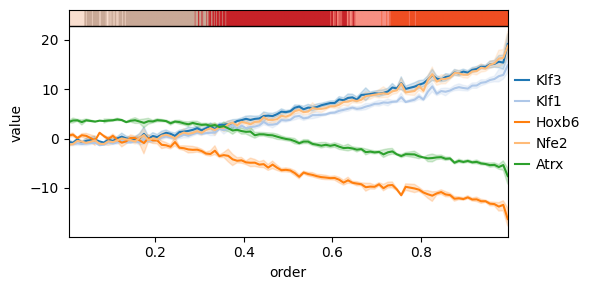

In [20]:
# Values based on the pseudotime bin
dc.pl.order(
    df=bin_tfs,
    mode="line",
    figsize=(6, 3)
)

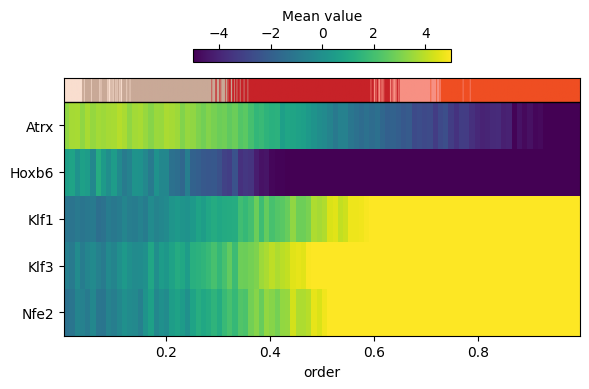

In [22]:
# Matrix plot
dc.pl.order(
    df=bin_tfs,
    mode="mat",
    kw_order={"vmin": -5, "vmax": +5}, figsize=(6,4)
)

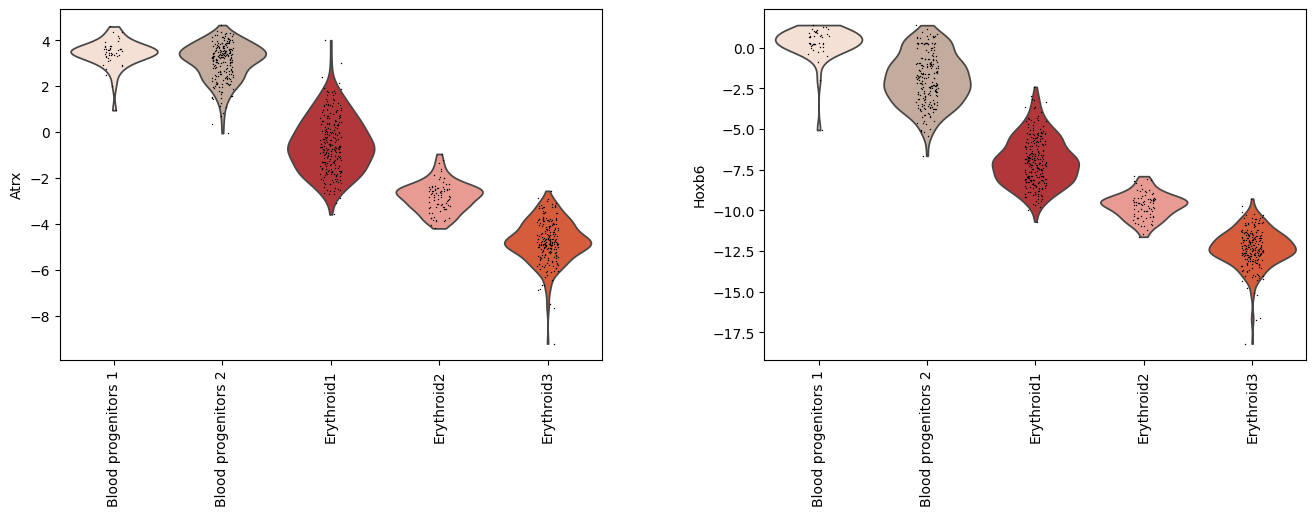

In [23]:
# Atrx and Hoxb6 are active in the beginning
tfs = ["Atrx", "Hoxb6"]
sc.pl.violin(score, keys=tfs, groupby="celltype", rotation=90)

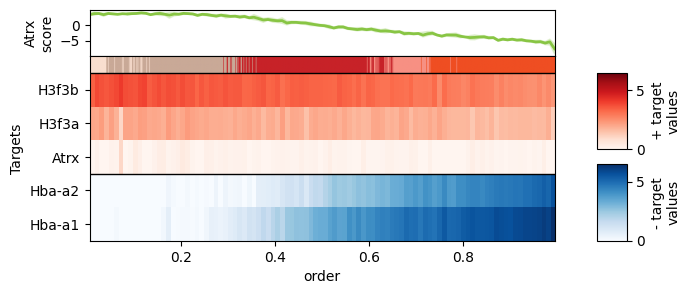

In [26]:
# Plotting the targets of the transcription factor along the trajectory
dc.pl.order_targets(
    adata=adata,
    net=collectri,
    label="celltype",
    source="Atrx",
    order="dpt_pseudotime"
)

# 3. PROGENy pathway score

In [27]:
# Progeny
progeny = dc.op.progeny(organism="mouse")
progeny

,source,target,weight,padj
0,Androgen,Tmprss2,11.490631,2.384806e-47
1,Androgen,Nkx3-1,10.622551,2.205102e-44
2,Androgen,Mboat2,10.472733,4.632376e-44
3,Androgen,Slc38a4,7.363805,1.253071e-39
4,Androgen,Mtmr9,6.130646,2.534403e-38
...,...,...,...,...
60572,p53,Enpp2,2.771405,4.993215e-02
60573,p53,Arrdc4,3.494328,4.996747e-02
60574,p53,Myo1b,-1.148057,4.997905e-02
60575,p53,Ctsc,-1.784693,4.998864e-02


In [28]:
# Scoring
dc.mt.ulm(data=adata, net=progeny)
score = dc.pp.get_obsm(adata=adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 801 × 14
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'dpt_pseudotime'
    uns: 'celltype_colors', 'log1p', 'stage_colors', 'neighbors', 'diffmap_evals', 'paga', 'celltype_sizes', 'iroot'
    obsm: 'X_pca', 'X_umap', 'X_diffmap', 'score_ulm', 'padj_ulm'

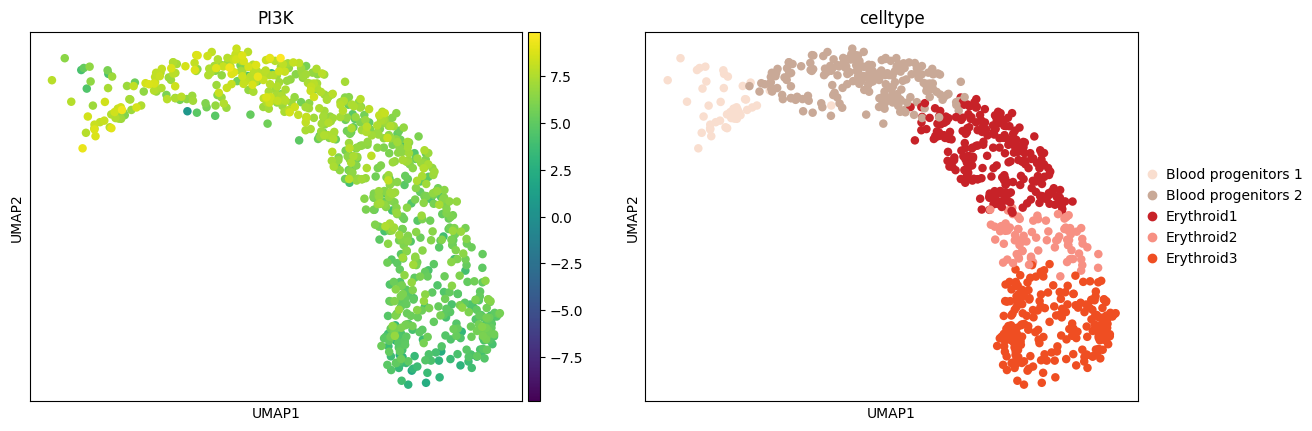

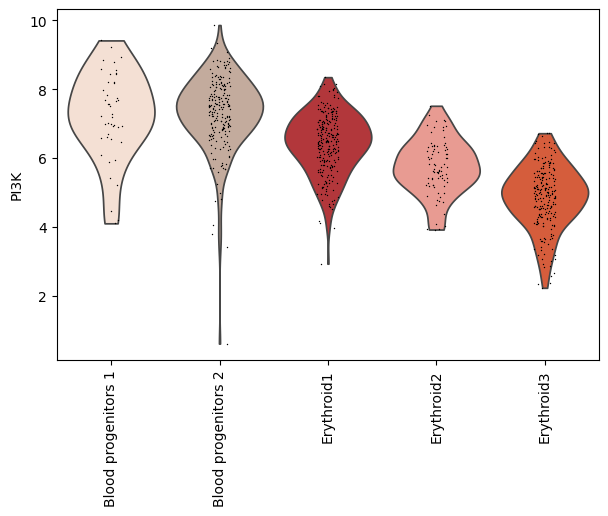

In [30]:
# Plotting
sc.pl.umap(score, color=["PI3K", "celltype"], vcenter=0)
sc.pl.violin(score, keys=["PI3K"], groupby="celltype", rotation=90)

The next steps are exactly the same as before and include the calculate of scores and testing their association with trajectory.